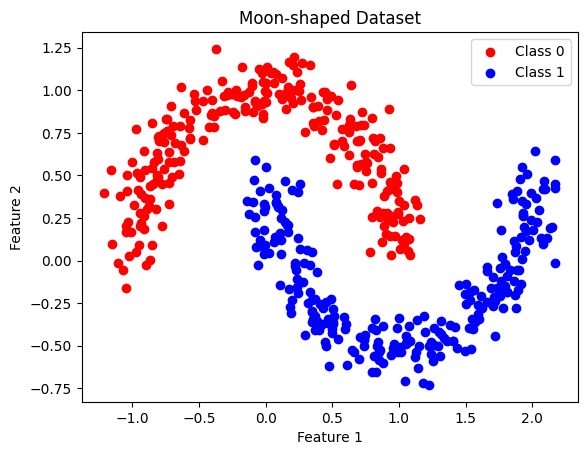

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn. datasets import make_moons
X_moons, Y_moons = make_moons (n_samples=500, noise=0.1, random_state=42)
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split (X_moons, Y_moons, test_size=0.5, random_state=3)
plt.scatter (X_moons [Y_moons == 0] [:, 0], X_moons [Y_moons == 0] [:, 1], color='red', label='Class 0')
plt.scatter (X_moons [Y_moons == 1] [:, 0], X_moons [Y_moons == 1] [:, 1], color='blue', label='Class 1')
plt.xlabel ('Feature 1')
plt.ylabel ('Feature 2')
plt.legend ()
plt.title ("Moon-shaped Dataset")
plt.show ()

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def find_decision_boundary(start_x, end_x, weights, biases):
    inputs = np.linspace(start_x, end_x)
    output = -(weights[0] * inputs + biases)
    output = output / weights[1]
    return inputs, output

def initialize_weights(sm, num_neurons_layer1, num_neurons_layer2):
    np.random.seed(10)
    weights = np.random.rand(num_neurons_layer1, num_neurons_layer2) * sm
    biases = np.zeros((num_neurons_layer1, 1))
    weights_layer2 = np.array([[1]*num_neurons_layer1])
    biases_layer2 = num_neurons_layer1 - 1
    return weights, biases, weights_layer2, biases_layer2

def apply_activation_function(net):
    h = np.where(net >= 0, 1, -1)
    return h

def forward_propagation(weights, inputs, biases, should_reshape):
    if should_reshape:
        inputs = inputs.reshape((2, 1))
    net_input = np.dot(weights, inputs) + biases
    outputs = apply_activation_function(net_input)
    return net_input, outputs

def update_weights(weights, biases, inputs, target, net_input, output, learning_rate, num_neurons_layer1):
    inputs = inputs.reshape((1, 2))
    net_input = net_input.reshape((num_neurons_layer1, 1))
    if target == output:
        return weights, biases
    elif target == 1 and target != output:    #output=-1 but target=1
        argmax_neuron = np.argmax(net_input)
        diff_bias = learning_rate * (1 - net_input[argmax_neuron])
        diff_weight = learning_rate * np.dot((1 - net_input[argmax_neuron]), inputs)
        biases[argmax_neuron] = biases[argmax_neuron] + diff_bias
        weights[argmax_neuron] = weights[argmax_neuron] + diff_weight
    elif target == -1 and target != output:   # output=1 but target=-1
        positive_indices = np.argwhere(net_input > 0)
        diff_bias = learning_rate * (-1 - net_input)
        diff_weight = learning_rate * np.dot((-1 - net_input), inputs)
        new_biases = biases + diff_bias
        new_weights = weights + diff_weight
        for i in positive_indices[:, 0]:
            weights[i] = new_weights[i]
            biases[i] = new_biases[i]
    return weights, biases

def calculate_error(target, output):
    error = 0.5 * np.power((target - output), 2)
    return error

def predict(inputs, target, weights, biases, num_neurons_layer1):
    predicted_output = []
    biases_layer2 = np.zeros((num_neurons_layer1, 1))
    weights_layer2 = np.array([[1]*num_neurons_layer1])
    biases_layer2 = num_neurons_layer1 - 1
    for i in range(inputs.shape[0]):
        net_input, outputs = forward_propagation(weights, inputs[i], biases, should_reshape=True)
        net_input2, output = forward_propagation(weights_layer2, outputs, biases_layer2, should_reshape=False)
        predicted_output.append(output[0])
    return predicted_output





In [ ]:
def MRI(df0, df1, inputs, target, num_neurons_layer1=3, num_neurons_layer2=2, learning_rate=0.001, max_iter=10000, samples=None, plot=True):
    # If samples is not provided, set it to the number of rows in the input data.
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.5, random_state=3)
    if samples is None:
        samples = inputs_train.shape[0]
    # Print the number of samples.
    print('sample:', samples)
    # Initialize variables
    sm = 0.001
    error_list = []
    errors = []
    mean_error = 10**3
    weights, biases, weights_layer2, biases_layer2 = initialize_weights(sm, num_neurons_layer1, num_neurons_layer2)  # Step 0
    # Iterate through the training process
    for i in range(max_iter):
        # Perform forward propagation
        net_input, outputs = forward_propagation(weights, inputs_train[i % samples], biases, should_reshape=True)  # Step 4 and 5
        net_input2, output = forward_propagation(weights_layer2, outputs, biases_layer2, should_reshape=False)  # Step 6
        # Calculate the error of the output
        error = calculate_error(target_train[i % samples], output)
        errors.append(error)
        # If an epoch has ended, calculate the mean error of the epoch and append it to the error list
        if i % samples == 0 and i != 0:
            mean_error = np.mean(errors)
            error_list.append(mean_error)
            errors = []
            # Print the epoch number and the mean error of the epoch
            print('Epoch %d / %d' % (len(error_list), int(max_iter / samples)))
            print('loss:', mean_error)
            for j in range(len(weights)):
                # Print the weights and biases for each layer
                print('W%d:'%(j+1),weights[j])
                print('b%d:'%(j+1),biases[j])
        # If the mean error is 0 or the difference between the mean error of the last two epochs is 0, an early stop occurred
        if mean_error == 0 or (i > 50 and len(error_list) >= 2 and error_list[-1] - error_list[-2] == 0):
            print('An early stop occurred!')
            # If plot is True, plot the error, decision boundary, confusion matrix, and classification report
            if plot:
                plt.plot(error_list)
                plt.xlabel('Epochs')
                plt.ylabel('Mean Squared Error')
                plt.title('Error Plot')
                plt.grid(True)
                # plt.savefig('error_plot.pdf')
                plt.show()
                df0 = df0
                df1 = df1
                plt.scatter(df0['x'], df0['y'], c ="red", linewidths = 0.1)
                plt.scatter(df1['x'], df1['y'], c ="blue", linewidths = .1)
                # Plot the decision boundary
                for i in range(num_neurons_layer1):
                    px1, px2 = find_decision_boundary(-2, 2, weights[i], biases[i])
                    plt.plot(px1, px2)

                plt.xlabel("x")
                plt.ylabel("y")
                plt.legend(["Class 1" , "Class 2"])
                plt.xlim([-2, 2])
                plt.ylim([-2, 2])
                # plt.savefig('error_plot1.pdf')
                plt.show()
                # Generate predictions
                print()
                predicted_output = predict(inputs_test, target_test, weights, biases, num_neurons_layer1)
                # Create confusion matrix
                cm = confusion_matrix(target_test, predicted_output)
                # Plot heatmap of confusion matrix
                plt.figure(figsize=(6, 4))
                sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
                plt.xlabel("Predicted labels")
                plt.ylabel("True labels")
                plt.title("Confusion Matrix")
                plt.tight_layout()
                # Save plot as PDF
                # plt.savefig("confusion_matrix.pdf")
                plt.show()
                predicted_output = predict(inputs_test, target,weights,biases,num_neurons_layer1)
                print(classification_report(target_test, predicted_output))
            return weights, biases, error_list
        weights, b = update_weights(weights, biases, inputs_train[i % samples], target[i % samples], net_input, output, learning_rate, num_neurons_layer1)  # Step 7

    if plot:
        plt.plot(error_list)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Error Plot')
        plt.grid(True)
        # plt.savefig('error_plot.pdf')
        plt.show()
        df0 = df0
        df1 = df1
        plt.scatter(df0['x'], df0['y'], c ="red", linewidths = 0.1)
        plt.scatter(df1['x'], df1['y'], c ="blue", linewidths = .1)

        for i in range(num_neurons_layer1):
            px1, px2 = find_decision_boundary(-2, 2, weights[i], biases[i])
            plt.plot(px1, px2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1" , "Class 2"])
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        # plt.savefig('error_plot1.pdf')
        plt.show()
        # Generate predictions
        predicted_output = predict(inputs_test, target_test, weights, biases, num_neurons_layer1)
        # Create confusion matrix
        cm = confusion_matrix(target_test, predicted_output)
        # Plot heatmap of confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        # Save plot as PDF
        # plt.savefig("confusion_matrix.pdf")
        plt.show()
        predicted_output = predict(inputs_test, target_test,weights,biases,num_neurons_layer1)
        print(classification_report(target_test, predicted_output))

    return weights, biases, error_list

<ipython-input-33-7c86829ca23c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][df['label'] == 0] = -1


sample: 250
Epoch 1 / 40
loss: 1.0278884462151394
W1: [ 4.45403161e-04 -4.49491081e-05]
b1: [-0.00200009]
W2: [ 0.00240315 -0.00407213]
b2: [-9.76081941e-06]
W3: [-0.0006627  -0.00103005]
b3: [-0.00199946]
Epoch 2 / 40
loss: 1.008
W1: [-0.00129515 -0.00086707]
b1: [-0.00199356]
W2: [ 0.00311355 -0.00300228]
b2: [-0.0010102]
W3: [-0.00070411 -0.00112755]
b3: [-0.00199788]
Epoch 3 / 40
loss: 1.032
W1: [-0.00080516 -0.00035646]
b1: [-0.00199506]
W2: [-0.00021616 -0.00461535]
b2: [-0.00401582]
W3: [ 0.00165142 -0.00145019]
b3: [5.35965208e-06]
Epoch 4 / 40
loss: 0.992
W1: [ 0.00147346 -0.00135796]
b1: [0.0010105]
W2: [-0.00021806 -0.00467315]
b2: [-0.0040149]
W3: [-0.00016442  0.00192301]
b3: [-0.00300689]
Epoch 5 / 40
loss: 0.984
W1: [ 0.00123059 -0.0017039 ]
b1: [1.25702197e-05]
W2: [-0.00132434 -0.00471354]
b2: [-0.00401393]
W3: [-0.00272351  0.00066086]
b3: [-0.00300606]
Epoch 6 / 40
loss: 0.952
W1: [ 0.00117335 -0.00136017]
b1: [0.00103092]
W2: [-0.00132434 -0.00471354]
b2: [-0.004013

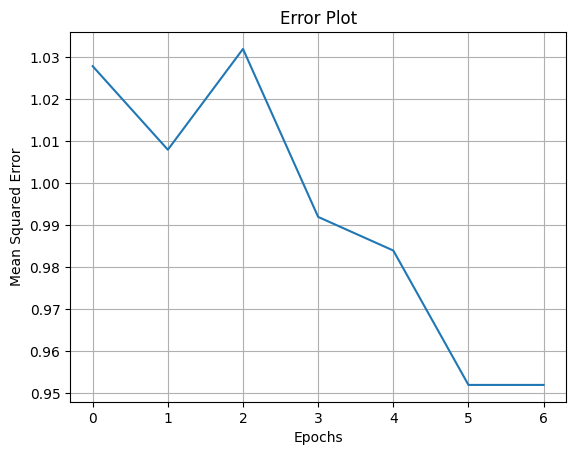

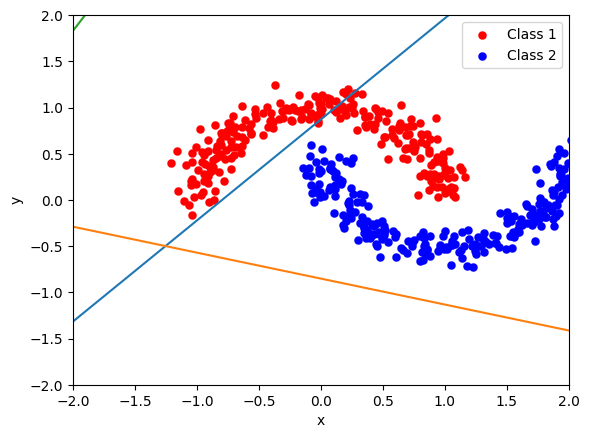

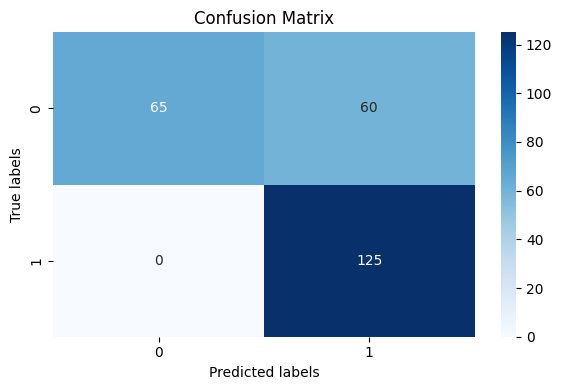

              precision    recall  f1-score   support

          -1       1.00      0.52      0.68       125
           1       0.68      1.00      0.81       125

    accuracy                           0.76       250
   macro avg       0.84      0.76      0.75       250
weighted avg       0.84      0.76      0.75       250



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Generate the moon-shaped dataset
X_moons, Y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)

# Create a DataFrame to work with
df = pd.DataFrame(data={'x': X_moons[:, 0], 'y': X_moons[:, 1], 'label': Y_moons})

# Convert labels to bipolar values
df['label'][df['label'] == 0] = -1

# Create subsets df0 and df1 based on labels
df0 = df[df['label'] == -1]
df1 = df[df['label'] == 1]

# Extract inputs and target from the DataFrame
data = df[['x', 'y']].to_numpy()
target = df['label'].to_numpy()

# Split the data into training and testing sets
# inputs_train, inputs_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

num_neurons_layer1=3
num_neurons_layer2=2

# Now, you can apply your existing code to this new dataset with train-test split
weights, biases, error_list = MRI(df0, df1, data, target ,num_neurons_layer1, num_neurons_layer2)


sample: 250
Epoch 1 / 40
loss: 0.9960159362549801
W1: [ 0.00229369 -0.0023869 ]
b1: [-0.0010012]
W2: [-0.00130008 -0.00033791]
b2: [-0.00199964]
W3: [-0.00199348 -0.00012346]
b3: [-0.00199143]
W4: [-8.59671355e-04 -9.14752058e-05]
b4: [-0.00201564]
W5: [-0.00137373 -0.00072182]
b5: [-0.00199671]
Epoch 2 / 40
loss: 1.016
W1: [ 0.00024386 -0.00283092]
b1: [-0.00200248]
W2: [ 0.00183314 -0.00067898]
b2: [-4.17087209e-07]
W3: [-0.00159043 -0.00116495]
b3: [-0.00199025]
W4: [-0.00017247 -0.00084482]
b4: [-0.00201787]
W5: [-0.00137373 -0.00072182]
b5: [-0.00199671]
Epoch 3 / 40
loss: 1.032
W1: [-0.00093631 -0.00211176]
b1: [-0.0030028]
W2: [-0.00059573 -0.00035758]
b2: [-0.00101109]
W3: [ 0.00301655 -0.00301531]
b3: [-0.00099148]
W4: [-0.00076904 -0.00050125]
b4: [-0.00201804]
W5: [-0.00056513 -0.00078722]
b5: [-0.00199828]
Epoch 4 / 40
loss: 0.976
W1: [-0.00093631 -0.00211176]
b1: [-0.0030028]
W2: [-0.00195531 -0.00109262]
b2: [-0.00202155]
W3: [-0.00035243 -0.00410793]
b3: [-0.00399688]
W4

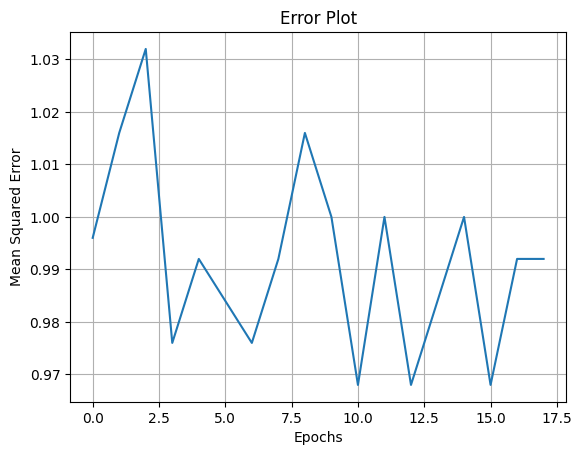

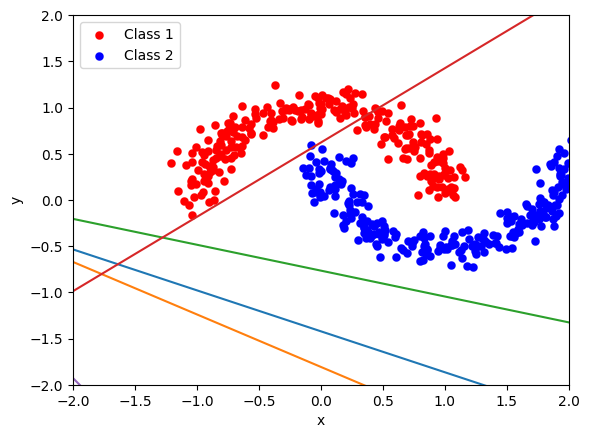

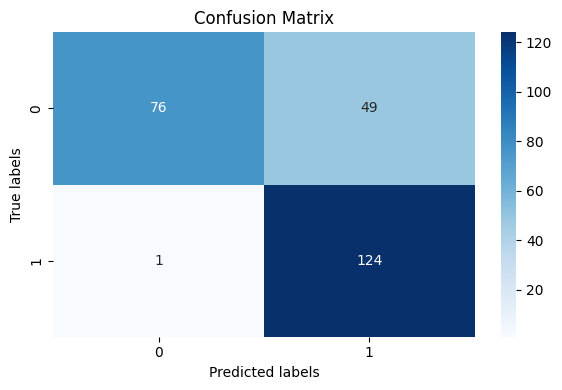

              precision    recall  f1-score   support

          -1       0.99      0.61      0.75       125
           1       0.72      0.99      0.83       125

    accuracy                           0.80       250
   macro avg       0.85      0.80      0.79       250
weighted avg       0.85      0.80      0.79       250



In [ ]:
num_neurons_layer1=5
num_neurons_layer2=2

# Now, you can apply your existing code to this new dataset with train-test split
weights, biases, error_list = MRI(df0, df1, data, target ,num_neurons_layer1, num_neurons_layer2)

sample: 250
Epoch 1 / 40
loss: 0.9960159362549801
W1: [-0.00097399  0.00035438]
b1: [-0.00200305]
W2: [-0.00173444  0.00029348]
b2: [-0.00200205]
W3: [-5.17924110e-04 -2.77311793e-05]
b3: [-0.00200045]
W4: [-0.00073538 -0.0010369 ]
b4: [-0.00200237]
W5: [-0.00044022 -0.00063982]
b5: [-0.00200022]
W6: [ 0.00259132 -0.00115554]
b6: [-7.45466133e-06]
W7: [-0.00064345 -0.00028409]
b7: [-0.00200633]
W8: [-1.54124973e-03 -3.89565683e-05]
b8: [-0.00199773]
Epoch 2 / 40
loss: 1.016
W1: [-0.00143317 -0.00080415]
b1: [-0.00099578]
W2: [-0.0007306  -0.00042772]
b2: [-0.00201173]
W3: [ 0.00078968 -0.00031696]
b3: [-0.00200095]
W4: [-0.00073538 -0.0010369 ]
b4: [-0.00200237]
W5: [-0.00070052 -0.00079841]
b5: [-0.00199772]
W6: [ 0.00236467 -0.00256446]
b6: [-2.26517843e-06]
W7: [-0.00064345 -0.00028409]
b7: [-0.00200633]
W8: [-0.00082439 -0.00065589]
b8: [-0.00199967]
Epoch 3 / 40
loss: 1.008
W1: [-0.00070877 -0.0004074 ]
b1: [-0.00200454]
W2: [-0.0007306  -0.00042772]
b2: [-0.00201173]
W3: [-0.0007

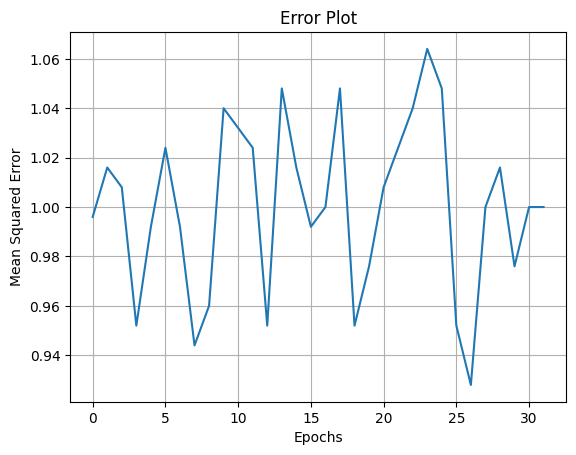

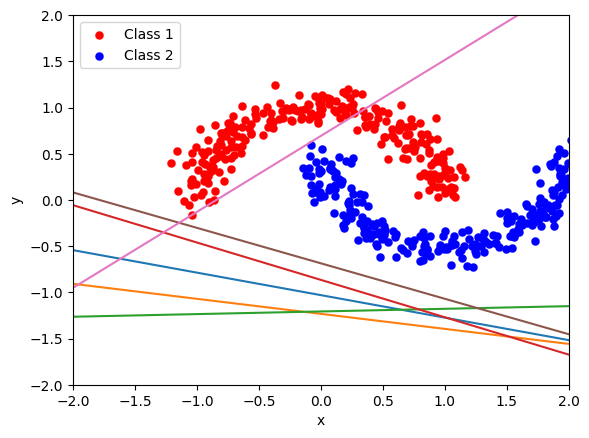

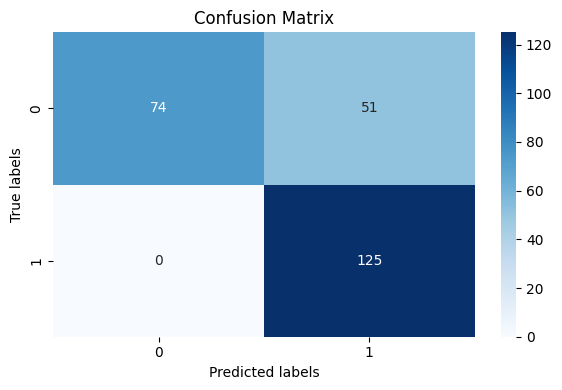

              precision    recall  f1-score   support

          -1       1.00      0.59      0.74       125
           1       0.71      1.00      0.83       125

    accuracy                           0.80       250
   macro avg       0.86      0.80      0.79       250
weighted avg       0.86      0.80      0.79       250



In [ ]:
num_neurons_layer1=8
num_neurons_layer2=2

# Now, you can apply your existing code to this new dataset with train-test split
weights, biases, error_list = MRI(df0, df1, data, target ,num_neurons_layer1, num_neurons_layer2)